In [1]:
import csv
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Phase No.-4, Req. No.-4.1
# We have renamed the csv file '01_District_wise_crimes_committed_IPC_2001_2012' as 'Total_Crime'
# And deleted the rows named 'Total' under District column & importing here.
totalcrime_df=pd.read_csv('Total_Crime.csv')

In [3]:
totalcrime_df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
8605,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,18,227,18,53,6,327,0,292,1144,5558
8606,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
8607,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787


In [4]:
totalcrime_df.isna().sum()

STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0
AUTO THEFT                     

In [5]:
totalcrime_df.dtypes

STATE/UT                                               object
DISTRICT                                               object
YEAR                                                    int64
MURDER                                                  int64
ATTEMPT TO MURDER                                       int64
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER               int64
RAPE                                                    int64
CUSTODIAL RAPE                                          int64
OTHER RAPE                                              int64
KIDNAPPING & ABDUCTION                                  int64
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS             int64
KIDNAPPING AND ABDUCTION OF OTHERS                      int64
DACOITY                                                 int64
PREPARATION AND ASSEMBLY FOR DACOITY                    int64
ROBBERY                                                 int64
BURGLARY                                                int64
THEFT   

In [6]:
totalcrime_df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [7]:
columns_for_clustering = ['TOTAL IPC CRIMES']
subset_df = totalcrime_df[columns_for_clustering]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(subset_df)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
totalcrime_df['Cluster'] = kmeans.fit_predict(scaled_data)
cluster_labels = {
    0: 'Peaceful Area',
    1: 'Moderate Area',
    2: 'Sensitive Area'
}
totalcrime_df['Cluster_Label'] = totalcrime_df['Cluster'].map(cluster_labels)
print(totalcrime_df[['STATE/UT', 'DISTRICT', 'Cluster_Label']])

            STATE/UT       DISTRICT  Cluster_Label
0     ANDHRA PRADESH       ADILABAD  Peaceful Area
1     ANDHRA PRADESH      ANANTAPUR  Peaceful Area
2     ANDHRA PRADESH       CHITTOOR  Moderate Area
3     ANDHRA PRADESH       CUDDAPAH  Peaceful Area
4     ANDHRA PRADESH  EAST GODAVARI  Moderate Area
...              ...            ...            ...
8604        DELHI UT            STF  Peaceful Area
8605        DELHI UT           WEST  Moderate Area
8606     LAKSHADWEEP    LAKSHADWEEP  Peaceful Area
8607      PUDUCHERRY       KARAIKAL  Peaceful Area
8608      PUDUCHERRY     PUDUCHERRY  Peaceful Area

[8609 rows x 3 columns]


In [8]:
# Phase No.-4, Req. No.-4.2
sensitive_area_df = totalcrime_df[totalcrime_df['Cluster_Label'] == 'Sensitive Area']
moderate_area_df = totalcrime_df[totalcrime_df['Cluster_Label'] == 'Moderate Area']
peaceful_area_df = totalcrime_df[totalcrime_df['Cluster_Label'] == 'Peaceful Area']

In [9]:
sensitive_area_df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster,Cluster_Label
244,KARNATAKA,BANGALORE COMMR.,2001,221,327,5,40,0,40,152,...,40,223,51,229,0,38,11106,27254,2,Sensitive Area
356,MAHARASHTRA,MUMBAI,2001,295,200,6,127,0,127,148,...,18,274,44,198,0,709,6095,28968,2,Sensitive Area
668,DELHI UT,DELHI UT TOTAL,2001,547,510,63,381,0,381,1627,...,113,502,90,138,0,432,22000,54384,2,Sensitive Area
927,KARNATAKA,BANGALORE COMMR.,2002,201,311,4,32,0,32,159,...,33,237,62,242,0,45,11801,29120,2,Sensitive Area
1039,MAHARASHTRA,MUMBAI,2002,252,134,7,128,0,128,119,...,18,254,40,214,0,753,5950,26276,2,Sensitive Area
1352,DELHI UT,DELHI UT TOTAL,2002,531,440,68,403,0,403,1323,...,135,446,128,135,0,416,20876,49137,2,Sensitive Area
1616,KARNATAKA,BANGALORE COMMR.,2003,216,280,1,34,0,34,132,...,34,213,39,213,0,84,12547,29260,2,Sensitive Area
1734,MAHARASHTRA,MUMBAI,2003,242,115,8,133,0,133,150,...,8,282,44,199,0,632,5865,25686,2,Sensitive Area
2047,DELHI UT,DELHI UT TOTAL,2003,485,407,65,490,0,490,1156,...,130,489,105,1211,0,402,20045,47404,2,Sensitive Area
2310,KARNATAKA,BANGALORE COMMR.,2004,214,285,2,32,0,32,175,...,44,151,35,227,0,104,11008,28526,2,Sensitive Area


In [10]:
moderate_area_df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster,Cluster_Label
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,14,112,83,186,0,404,1262,5818,1,Moderate Area
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,12,109,58,247,0,431,2313,6507,1,Moderate Area
6,ANDHRA PRADESH,GUNTUR,2001,182,88,2,54,0,54,82,...,7,139,129,378,0,369,2426,7848,1,Moderate Area
7,ANDHRA PRADESH,HYDERABAD CITY,2001,111,113,7,37,0,37,80,...,24,118,27,746,0,409,1512,11831,1,Moderate Area
8,ANDHRA PRADESH,KARIMNAGAR,2001,162,85,6,56,0,56,67,...,62,414,81,224,0,322,1726,5811,1,Moderate Area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8599,DELHI UT,NORTH-WEST,2012,60,37,8,64,0,64,357,...,12,19,14,212,0,9,1253,4542,1,Moderate Area
8600,DELHI UT,OUTER,2012,96,60,15,67,0,67,572,...,15,79,18,244,0,90,2006,6344,1,Moderate Area
8601,DELHI UT,SOUTH,2012,39,19,3,70,0,70,245,...,17,59,36,68,0,25,1651,5045,1,Moderate Area
8602,DELHI UT,SOUTH-EAST,2012,46,69,6,116,0,116,538,...,11,160,43,123,0,218,2004,7040,1,Moderate Area


In [11]:
peaceful_area_df

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Cluster,Cluster_Label
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,16,149,34,175,0,181,1518,4154,0,Peaceful Area
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,7,118,24,154,0,270,754,4125,0,Peaceful Area
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,17,126,38,57,0,233,1181,3140,0,Peaceful Area
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,3,1,0,0,0,0,0,...,0,1,0,0,0,4,104,287,0,Peaceful Area
13,ANDHRA PRADESH,MEDAK,2001,101,56,12,35,0,35,26,...,26,100,25,192,0,335,454,3532,0,Peaceful Area
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8603,DELHI UT,SOUTH-WEST,2012,47,48,6,87,0,87,399,...,18,69,21,207,0,4,1387,4085,0,Peaceful Area
8604,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,6,0,Peaceful Area
8606,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,0,1,0,1,0,0,32,60,0,Peaceful Area
8607,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,0,2,0,1,0,44,392,787,0,Peaceful Area


In [12]:
sensitive_area_df.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Cluster', 'Cluster_Label'],
      dtype='object')

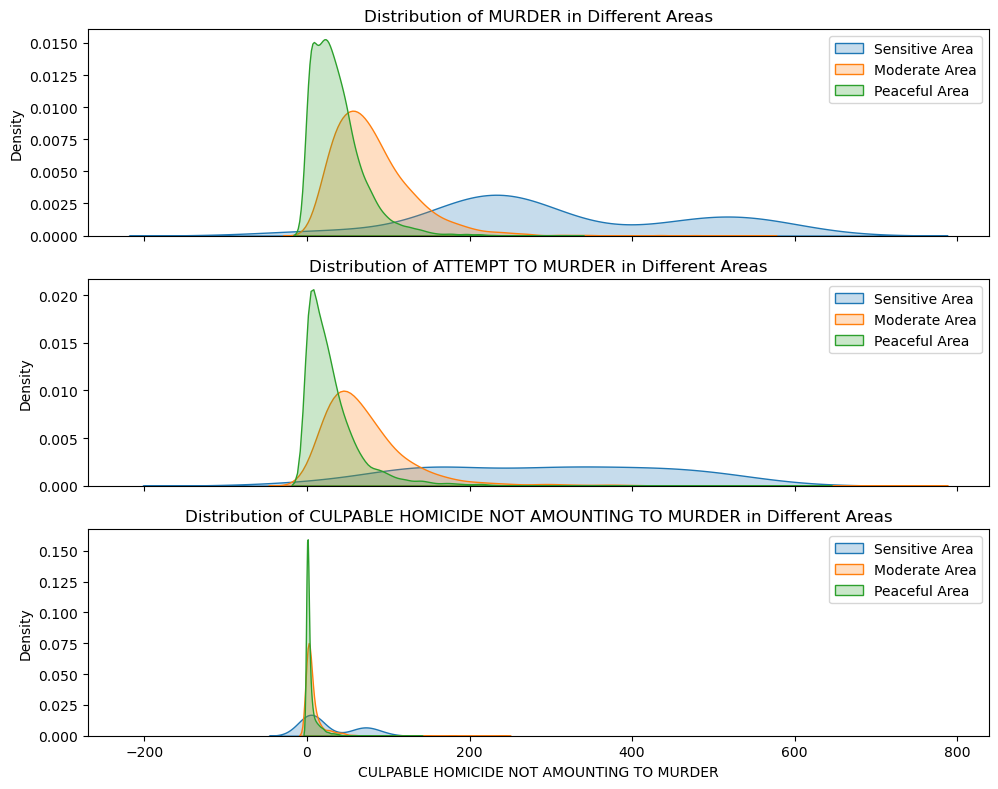

In [13]:
# Phase No.-4, Req. No.-4.3
crime_features = ['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER']
fig, axes = plt.subplots(nrows=len(crime_features), ncols=1, figsize=(10, 8), sharex=True)
for feature, ax in zip(crime_features, axes):
    sns.kdeplot(sensitive_area_df[feature], label='Sensitive Area', ax=ax, shade=True)
    sns.kdeplot(moderate_area_df[feature], label='Moderate Area', ax=ax, shade=True)
    sns.kdeplot(peaceful_area_df[feature], label='Peaceful Area', ax=ax, shade=True)
    ax.set_title(f'Distribution of {feature} in Different Areas')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()
# By the below kde plot of Murder, it observed that even in the peaceful areas such data points are there
# So in peaceful & moderate areas the high density data points of less crime exist but not zero
# But in sensitive areas the density is almost same for all number of murders & attempt to murder
# So in such sensitive areas it tends to such type of severe crime for attempting to murder
# Fortunately some attempt to murder could not converted to murder, otherwise it would be the wrost condition to live in

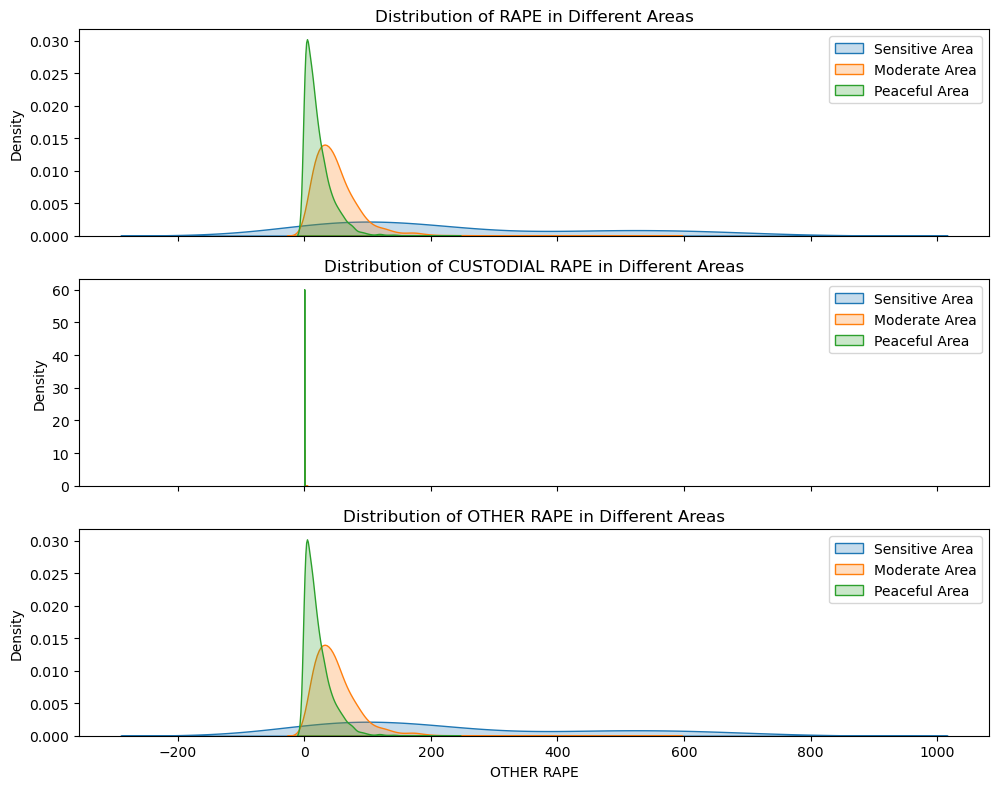

In [14]:
crime_features = ['RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE']
fig, axes = plt.subplots(nrows=len(crime_features), ncols=1, figsize=(10, 8), sharex=True)
for feature, ax in zip(crime_features, axes):
    sns.kdeplot(sensitive_area_df[feature], label='Sensitive Area', ax=ax, shade=True)
    sns.kdeplot(moderate_area_df[feature], label='Moderate Area', ax=ax, shade=True)
    sns.kdeplot(peaceful_area_df[feature], label='Peaceful Area', ax=ax, shade=True)
    ax.set_title(f'Distribution of {feature} in Different Areas')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()
# Similar to the above Murder cases the Rape cases data point's density is also same for almost all crime numbers in sensitive areas
# So as per our assumptions many of the murder cases arises because of such type of severe crime like rape.
# As per our opinion there sould be a strict law to prohibit the circulation of wrong materials on the internet
# The high quantity of Alcohal consumption and other drug addictions are also the reasons of murder and rape
# We can reduce the rape & murder crimes to some extent by controlling the above alcohal, drugs & wrong internet material circulations.

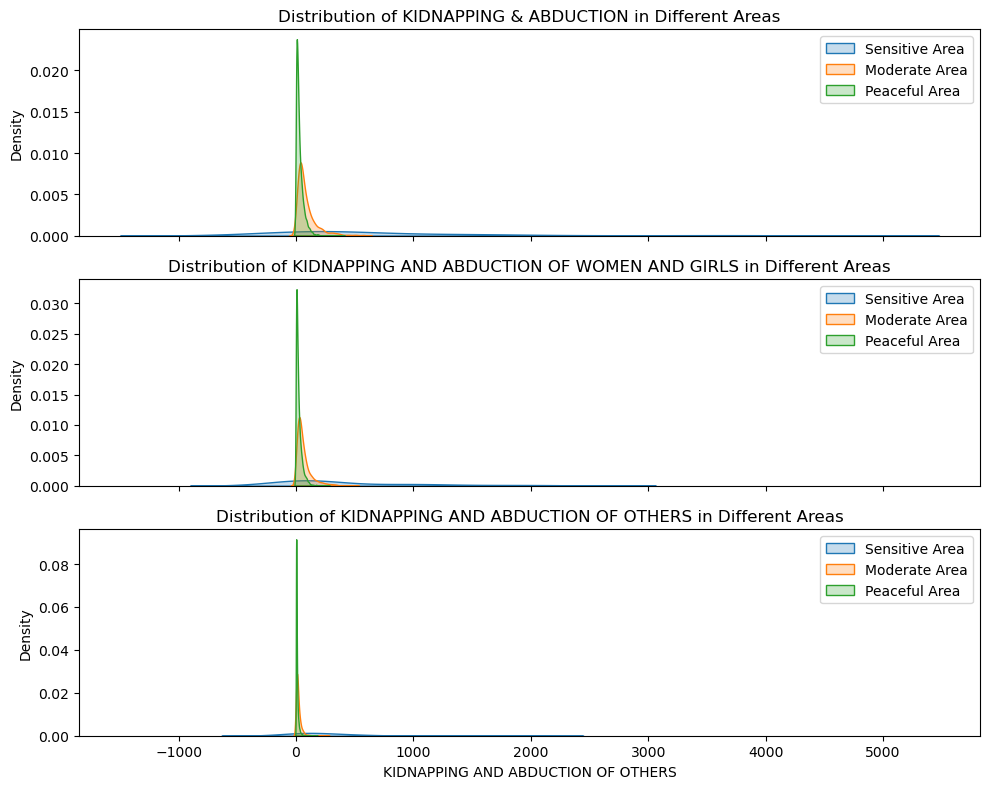

In [15]:
crime_features = ['KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS']
fig, axes = plt.subplots(nrows=len(crime_features), ncols=1, figsize=(10, 8), sharex=True)
for feature, ax in zip(crime_features, axes):
    sns.kdeplot(sensitive_area_df[feature], label='Sensitive Area', ax=ax, shade=True)
    sns.kdeplot(moderate_area_df[feature], label='Moderate Area', ax=ax, shade=True)
    sns.kdeplot(peaceful_area_df[feature], label='Peaceful Area', ax=ax, shade=True)
    ax.set_title(f'Distribution of {feature} in Different Areas')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()
# Number of Kidnapping crime are not very high at the sensitive areas also
# But it is flatten as not dense in at particular crime number
# As per our opinion the main causes of kidnapping are for money & rape
# Which might be reduced by employbility and by our previous opinions as above

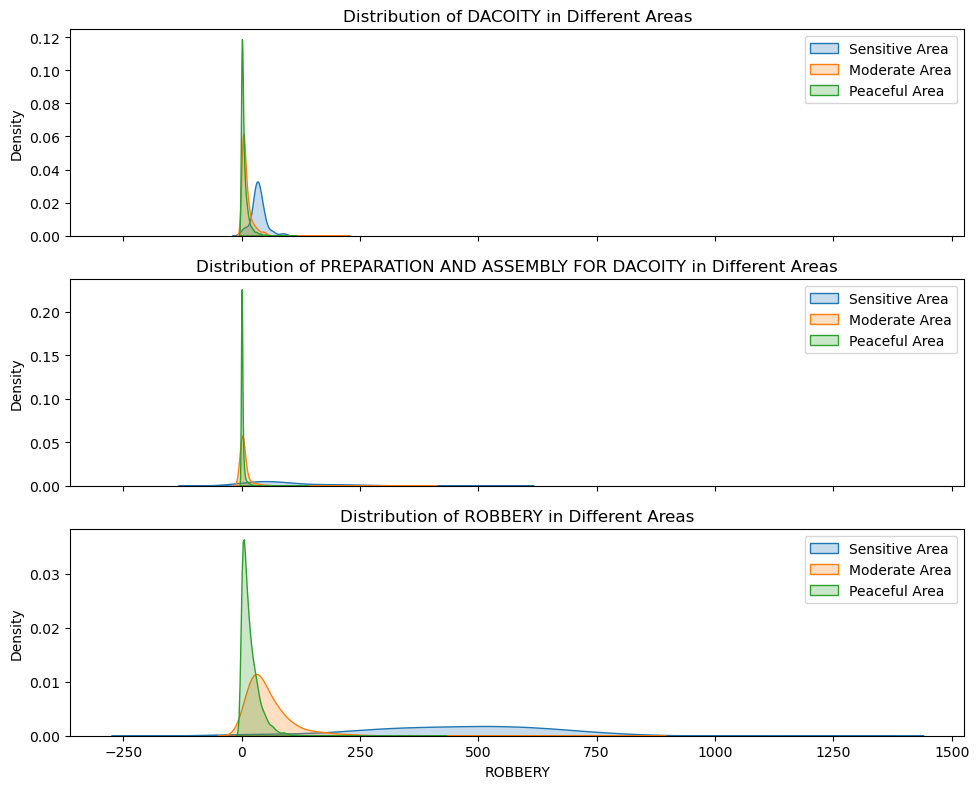

In [16]:
crime_features = ['DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY']
fig, axes = plt.subplots(nrows=len(crime_features), ncols=1, figsize=(10, 8), sharex=True)
for feature, ax in zip(crime_features, axes):
    sns.kdeplot(sensitive_area_df[feature], label='Sensitive Area', ax=ax, shade=True)
    sns.kdeplot(moderate_area_df[feature], label='Moderate Area', ax=ax, shade=True)
    sns.kdeplot(peaceful_area_df[feature], label='Peaceful Area', ax=ax, shade=True)
    ax.set_title(f'Distribution of {feature} in Different Areas')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()
# As per below, we are observing that most of the preparation for Dacoity have converted to fulfilled
# And as per the Robbery is concerned, the number of Robbery crime are not very low or high
# As we may see that many of the Dacoity crime has been stopped at its preparation level
# Such type of security alertness is required to reduce such type of crimes

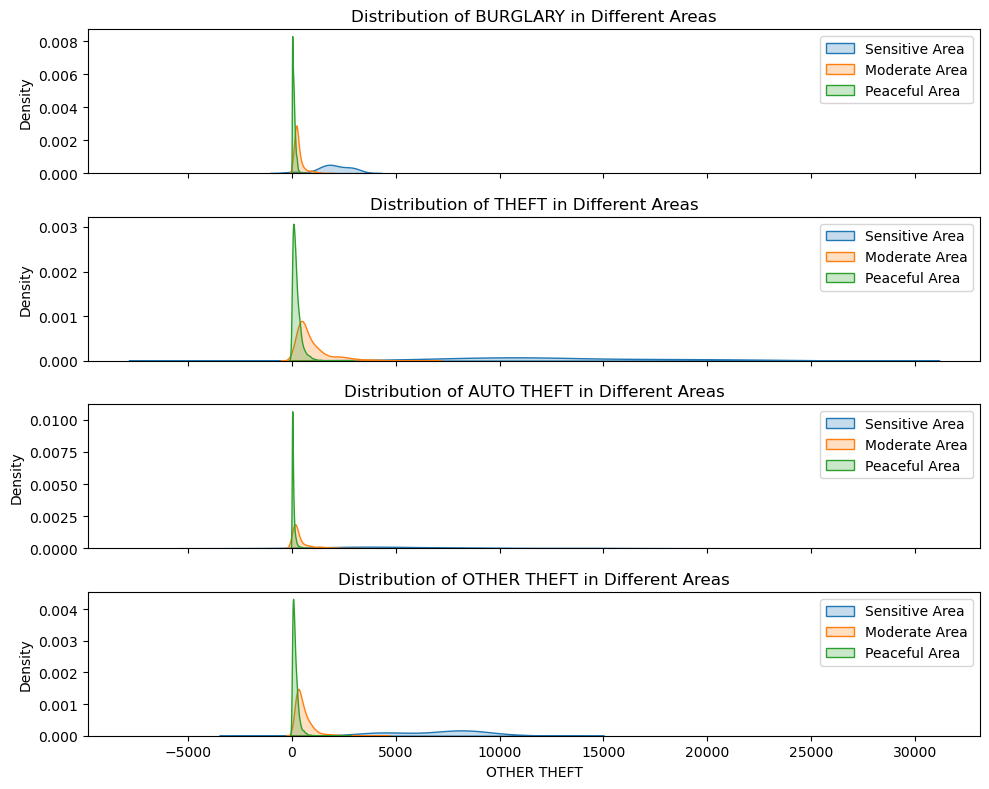

In [17]:
crime_features = ['BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT']
fig, axes = plt.subplots(nrows=len(crime_features), ncols=1, figsize=(10, 8), sharex=True)
for feature, ax in zip(crime_features, axes):
    sns.kdeplot(sensitive_area_df[feature], label='Sensitive Area', ax=ax, shade=True)
    sns.kdeplot(moderate_area_df[feature], label='Moderate Area', ax=ax, shade=True)
    sns.kdeplot(peaceful_area_df[feature], label='Peaceful Area', ax=ax, shade=True)
    ax.set_title(f'Distribution of {feature} in Different Areas')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()
# The density of Theft crime data points are flatten at most of the crime numbers but not very high
# As per our opinion the unemployment is the root cause of theft & other causes are drug & alcohal addictions
# It should work on these causes also to reduce such type of crimes

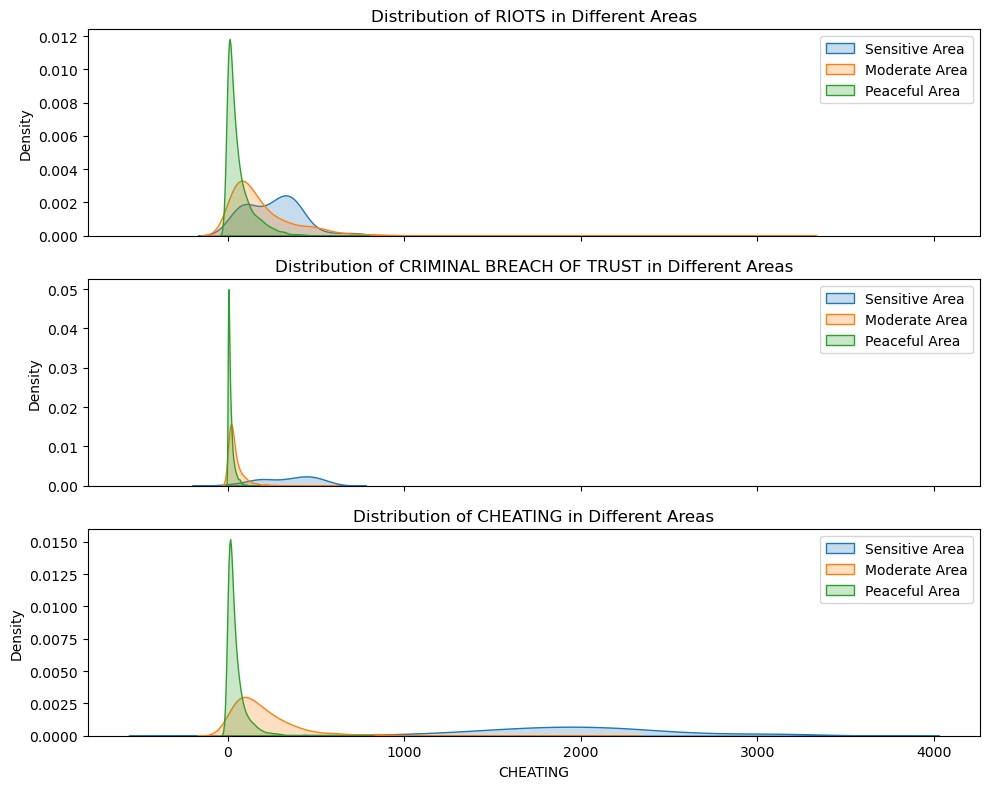

In [18]:
crime_features = ['RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING']
fig, axes = plt.subplots(nrows=len(crime_features), ncols=1, figsize=(10, 8), sharex=True)
for feature, ax in zip(crime_features, axes):
    sns.kdeplot(sensitive_area_df[feature], label='Sensitive Area', ax=ax, shade=True)
    sns.kdeplot(moderate_area_df[feature], label='Moderate Area', ax=ax, shade=True)
    sns.kdeplot(peaceful_area_df[feature], label='Peaceful Area', ax=ax, shade=True)
    ax.set_title(f'Distribution of {feature} in Different Areas')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()
# The Riots are seems to be almost same in both the sensitive & moderate areas
# As per our opinion the Riots may be reduced by stopping the rumors over social media platforms
# The breach of trust and cheating are not very high or low as per the below graphs
# As per our opinion cheating is the individual tendancy and thinking, which is hard to reduce directly
# The only way to reduce such type of crimes via punishment by law

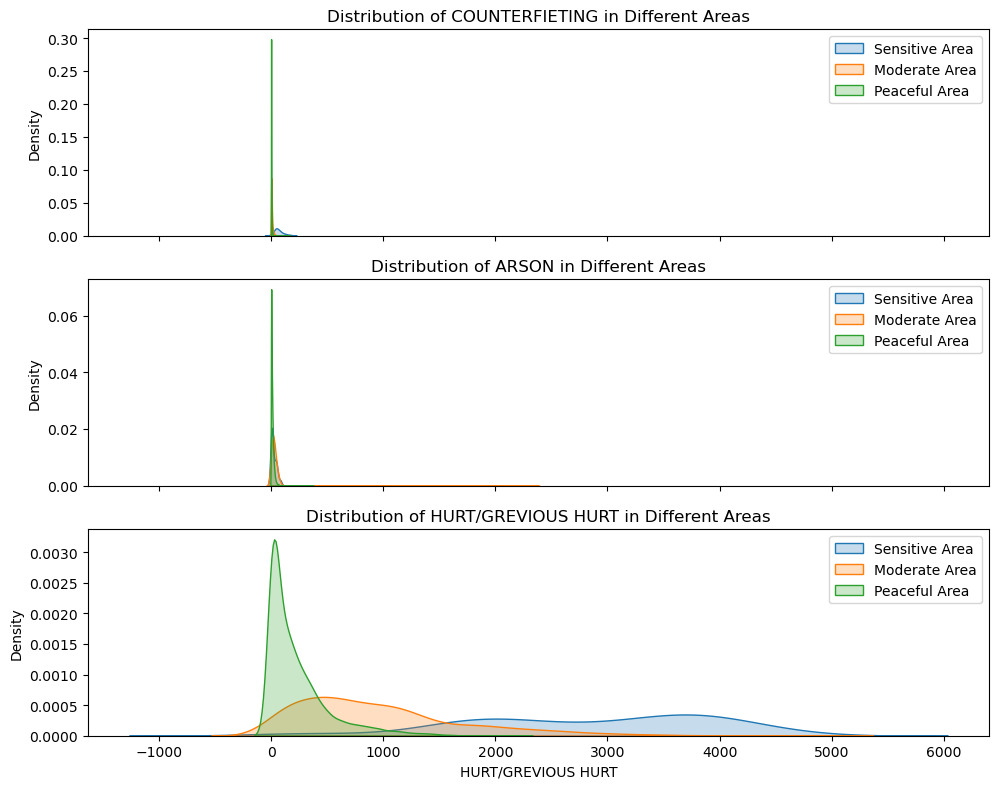

In [19]:
crime_features = ['COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT']
fig, axes = plt.subplots(nrows=len(crime_features), ncols=1, figsize=(10, 8), sharex=True)
for feature, ax in zip(crime_features, axes):
    sns.kdeplot(sensitive_area_df[feature], label='Sensitive Area', ax=ax, shade=True)
    sns.kdeplot(moderate_area_df[feature], label='Moderate Area', ax=ax, shade=True)
    sns.kdeplot(peaceful_area_df[feature], label='Peaceful Area', ax=ax, shade=True)
    ax.set_title(f'Distribution of {feature} in Different Areas')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()
# Hurt is not a very severe crime, but it should not be there in a better human society
# As per our opinion, we may reduce cheating and hurting tendancies by increasing human values
# The human values should be displayed via wall painting & hoardings etc in each cities
# Yoga & Meditation campuses & training should be organized to get the inner human values

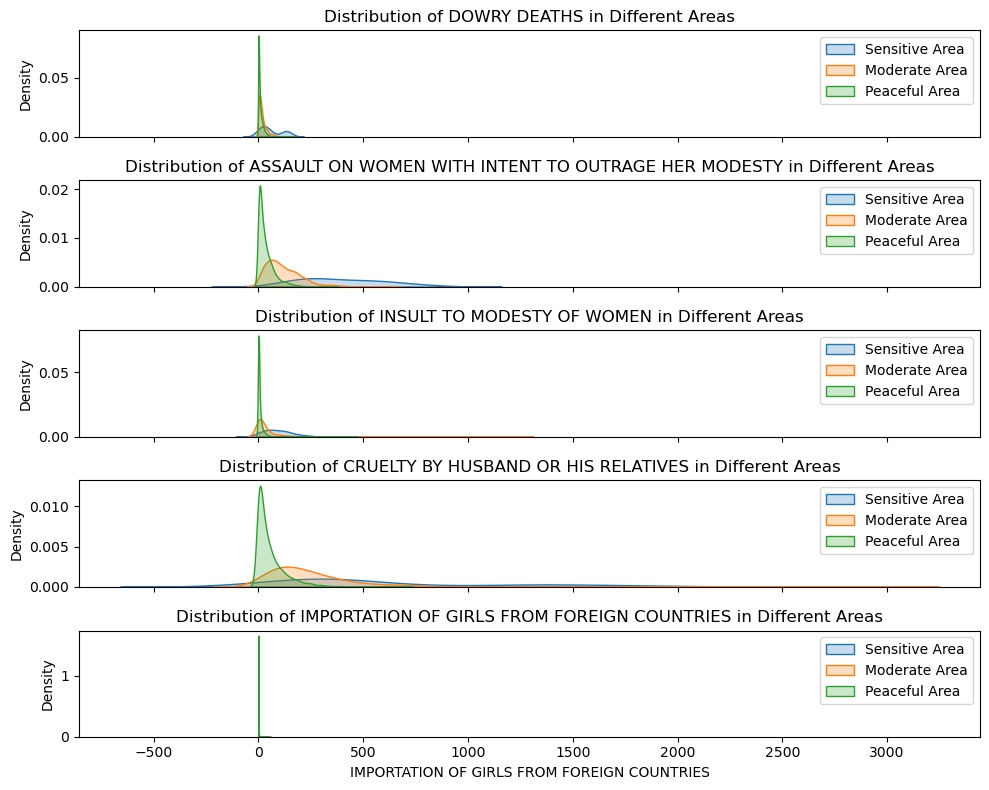

In [20]:
crime_features = ['DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES']
fig, axes = plt.subplots(nrows=len(crime_features), ncols=1, figsize=(10, 8), sharex=True)
for feature, ax in zip(crime_features, axes):
    sns.kdeplot(sensitive_area_df[feature], label='Sensitive Area', ax=ax, shade=True)
    sns.kdeplot(moderate_area_df[feature], label='Moderate Area', ax=ax, shade=True)
    sns.kdeplot(peaceful_area_df[feature], label='Peaceful Area', ax=ax, shade=True)
    ax.set_title(f'Distribution of {feature} in Different Areas')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()
# Even in the sensitive areas Dwory Death, Assault, Insult & Cruelty on Women are not very high numbers
# In our opinion the Dowry system should be totally removed any way by spreading awareness & law
# By spreading the awareness of the equal importance of Men & Women for the society, we may reduce such crimes
# By increasing women literacy rate & women employment also, such crimes may be reduced
# If any crime is not controlling via spreading awareness then only way to cotrol the same are punishment by law

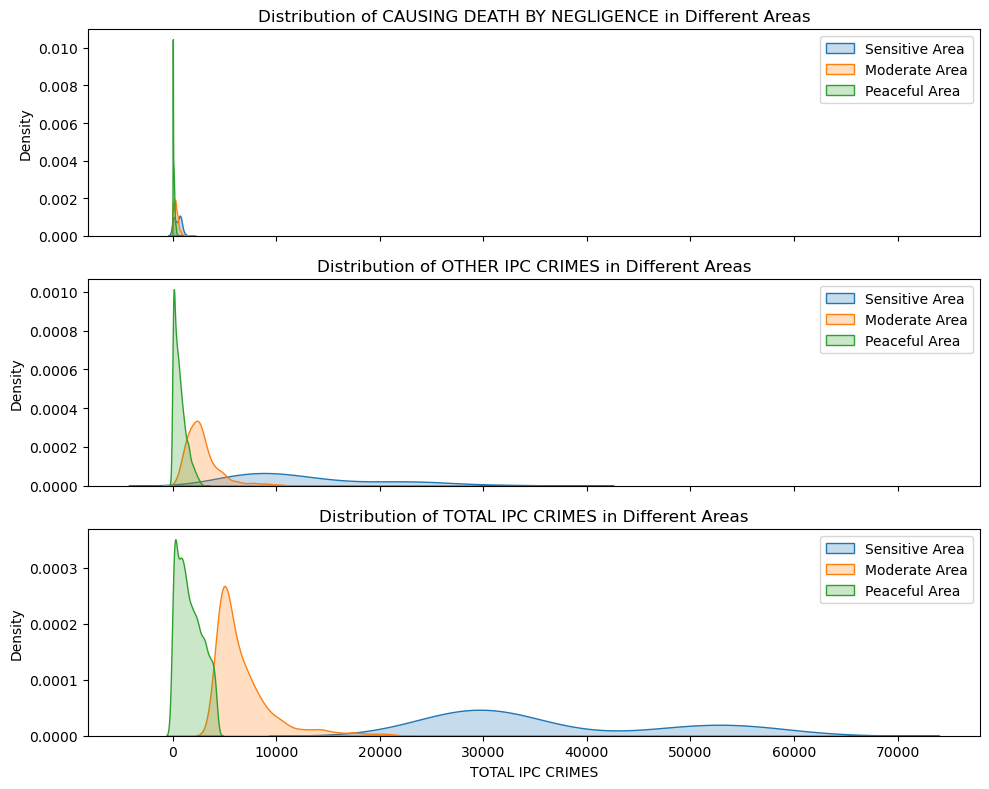

In [21]:
crime_features = ['CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']
fig, axes = plt.subplots(nrows=len(crime_features), ncols=1, figsize=(10, 8), sharex=True)
for feature, ax in zip(crime_features, axes):
    sns.kdeplot(sensitive_area_df[feature], label='Sensitive Area', ax=ax, shade=True)
    sns.kdeplot(moderate_area_df[feature], label='Moderate Area', ax=ax, shade=True)
    sns.kdeplot(peaceful_area_df[feature], label='Peaceful Area', ax=ax, shade=True)
    ax.set_title(f'Distribution of {feature} in Different Areas')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()
# In almost all the sensitive areas the other IPC crimes are there
# Even in the moderate areas also the total IPC crimes are there and not reaching to zero in any area
# In the sensitive areas, even the starting number of total IPC crimes are also high, which goes to very high point at the end
# By now, we observed that, Murder, Rape, Theft, Hurt & Other IPC crimes are highly contributing to the total IPC crime
# So these may be reduced by Literacy, Employment, Spreading Human Values, controlling the Internet Materials and at the end by Law Punishment

In [22]:
# Phase No.-4, Req. No.-4.4 (Capstone project overall story in our own words. Min 1000 words)

We have worked for our Capstone Project on Crimes in India from Year 2001 to Year 2012. So by considering the provided dataset we assumed that some more types of data which impacts on different types of crime are also needed like the area or space of that state, population, literacy rate and unemployment of each state. So we gathered these required datasets from different link and also by searching from google and Wikipedia etc. After cleaning and sorting the given dataset state wise and merging our gathered datasets, we have analysed that in each state there are the negative relationship between total crimes and literacy rate, as by increasing the literacy at that state the crime reduces to a some extent but not very strongly.
Also found the positive relationship between crimes and unemployment rate, population and area of that particular state or district. As by increase of the unemployment and population the crime also increases and more the area of any state or district more the crimes are there as per the ratio of the population of that area.
While analysing the dataset, we found that the maximum IPC crime cases are there in Madhya Pradesh with total 2413770 IPC crime cases. We also found that the murder cases are at its highest in Uttar Pradesh with total 65443 murder cases, attempt to murder cases are also larger in Uttar Pradesh with 60520 attempt to murder cases, the culpable homicide not amounting to murder crime is also highest in Uttar Pradesh with 17266 such type of crime cases, the maximum cases of rapes are found in Madhya Pradesh with 36087 rape cases, as per the kidnapping and abduction cases Uttar Pradesh again in the top with highest 59266 such types of cases, the maximum dacoity cases are found in Bihar state with 11099 dacoity cases during this period, but the preparation and assembly for dacoity crime cases found maximum in West Bengal with 10807 such crime cases, which seems much better alertness of West Bengal security agencies who have succeeded to catch these dacoity crimes at its preparation stage before the occurrence and fulfilment of such types of crimes, robbery with 37719 crime cases fond as the highest in Maharashtra state, burglary also found in top at Maharashtra with 185617 such types of crime cases, while analysing we observed that Maharashtra is the very sensitive state with concerned to the theft cases, as a very large number of theft cases Maharashtra again in the top for such kind of theft cases with 556807 crime cases, Bihar is seems to be the sensitive area for riots with 105096 riots cases, which shows that in bihar state, the lack of quick actions like stoping the internet for stoping the circulations of rumours, videos, speeches which may lead to increase the riot upto the worst and uncontrolled stage are considered, which cases the failure of bihar state to stop any riot at its earlier stage, moreover it may also assumed that the thought process are not matching among the peoples of bihar state, which might leads to riots type of crime cases within the state, again uttar pradesh is having the highest crime of criminal breach of trust with 38352 crime cases, for the first time Rajasthan state reaches on top with the highest cheating crime cases with 140800 such type of crime cases, Maharashtra is having the highest counterfeiting crime cases with 3806 such type of crimes, arson crime is highest in maharashtra with 14515 cases, Andhra Pradesh is coming on top for the first time by the hurt cases with 546565 such type of hurt crime cases, most of the dowry deaths are occurred in uttar pradesh with 23824 such dowry death cases and the main cause of this is the illiteracy especially the women illiteracies in uttar pradesh villages, assault of women with intent to outrage her modesty crimes are at its highest in madhya pradesh with 79878 such types of crime cases, again Andhara pradesh have the largest number of insult to modesty of women crimes with 36131 such types of crime cases, west bengal is found to be the highest crime with cruelty by husband or relatives on women with 130668 such cases, as per the given dataset crimes like importation of girls from foreign countries are very less and controlled in our country as we have observed that the highest number of such type of cases are in our bihar state with 440 such crime cases as the highest, Tamil Nadu reaches on the top for the first time by the crimes of causing death by negligence with 140193 such cases, apart from the above mentioned all types of crimes some other crimes comes under IPC act are considered highest in Madhya Pradesh with 1196582 such other IPC cases.
    We found Lakshadweep as the safest state in india with very less overall crimes as per our provided dataset.
We found that in the total crime dataset, mostly the crimes like murder, attempt to murder, rape, hurt, theft, dacoity, robbery and some other IPC crimes are the major contributors.
By creating fear for the punishment by law is a way to reduce such crimes to some extent, but by reducing the root cause of any crime we may reduce that concerned crime also to some more extent.
Like if any crime occurs for money, then awareness, skill development, increasing employability and by giving small loans to start one's own works, might decrease money related crimes to some extent.
For rape types of crimes, first of all the circulations of wrong and avoidable materials should be prohibited over the internet, as this may reduce such kind of crimes, but Afterall human values are much needed to stop such and all types of crimes in the society.
As per our opinion, if the Good Human Values may be displayed at many places of every cities, then these might impact on the thought process of the persons going to the wrong way and may lead to convert themselves toward the right way, by thinking what they are doing and what they should do.
Afterall by the very much alertness of our security organisations most of the crimes might be stopped before its occurrence. And by creating fear for the punishment by law and by using the latest security technologies like high quality cctv cameras and other newly invented security equipment we may reduce most of the crimes to some extent for our better and peaceful society.